In [22]:
from pathlib import Path
import re

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")


In [23]:
# 👇 Change this to your log file path
log_path = Path(
    "logs/3die_20sim_18-01-26_11-06-54.txt"
)

assert log_path.exists(), f"File not found: {log_path}"

log_text = log_path.read_text()
print("Log file loaded successfully")


Log file loaded successfully


In [24]:
pattern = re.compile(
    r"--- Simulation (\d+) ---.*?Match achieved with value \d+ in (\d+) iterations\.",
    re.DOTALL
)

records = []

for sim, iters in pattern.findall(log_text):
    records.append(
        {
            "simulation": int(sim),
            "iterations": int(iters),
        }
    )

df = pd.DataFrame(records)

In [25]:
assert not df.empty, "No simulations were parsed — check log format or regex"
df.head()


,simulation,iterations
0,1,1
1,2,78
2,3,43
3,4,4
4,5,53


In [26]:
df.describe()

,simulation,iterations
count,20.00000,20.000000
mean,10.50000,31.150000
std,5.91608,31.762731
min,1.00000,1.000000
25%,5.75000,6.000000
50%,10.50000,12.500000
75%,15.25000,54.750000
max,20.00000,96.000000


In [27]:
df["hit_cap"] = df["iterations"] >= 100
print("Min iterations:", df["iterations"].min())
print("Max iterations:", df["iterations"].max())

Min iterations: 1
Max iterations: 96


## Histogram → how long matches usually take

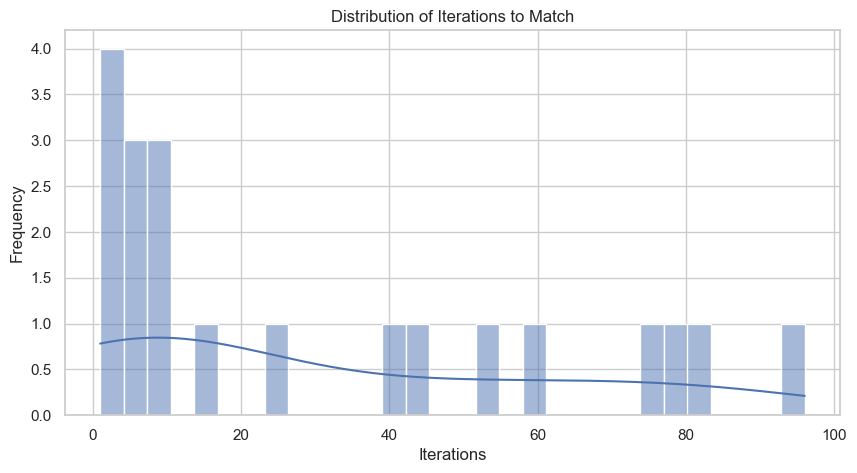

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="iterations", bins=30, kde=True)
plt.title("Distribution of Iterations to Match")
plt.xlabel("Iterations")
plt.ylabel("Frequency")
plt.show()


## Line plot → volatility run-to-run

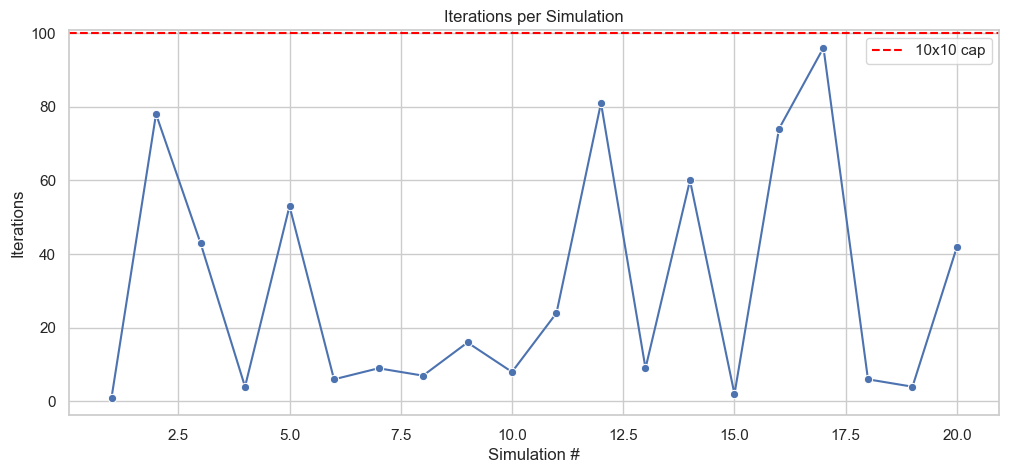

In [29]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="simulation", y="iterations", marker="o")
plt.axhline(100, color="red", linestyle="--", label="10x10 cap")
plt.title("Iterations per Simulation")
plt.xlabel("Simulation #")
plt.ylabel("Iterations")
plt.legend()
plt.show()


## Boxplot → skew & outliers

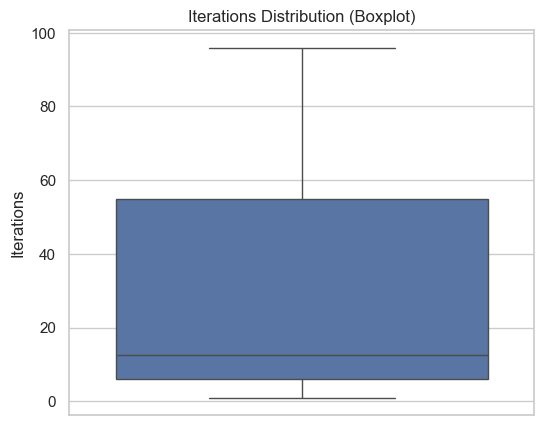

In [30]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["iterations"])
plt.title("Iterations Distribution (Boxplot)")
plt.ylabel("Iterations")
plt.show()


## Cap-hit scatter → how often 100 iterations wasn’t enough

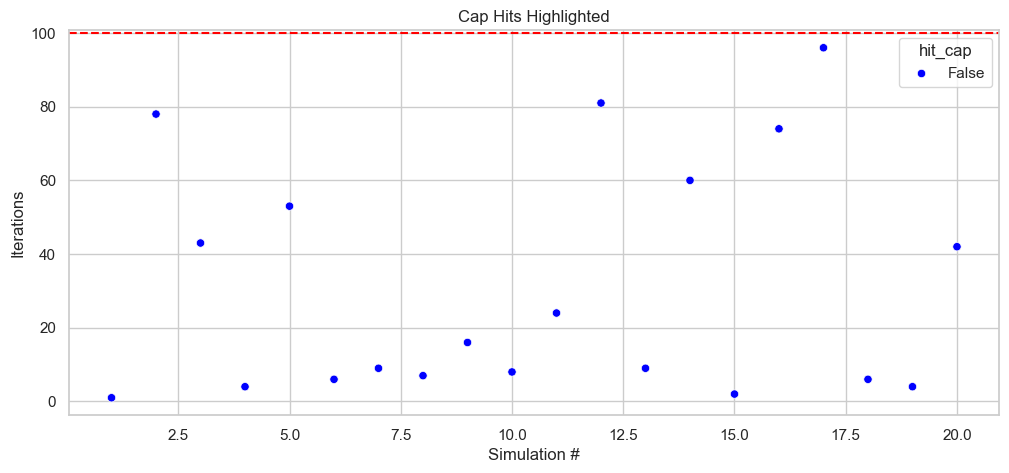

In [31]:
plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=df,
    x="simulation",
    y="iterations",
    hue="hit_cap",
    palette={True: "red", False: "blue"},
)
plt.axhline(100, color="red", linestyle="--")
plt.title("Cap Hits Highlighted")
plt.xlabel("Simulation #")
plt.ylabel("Iterations")
plt.show()
